# `xarray` Groupby

:::{admonition} Lesson Content
:class: note, dropdown

- groupby
- groupby bins

:::

## Context

Yesterday we began to explore working with data in xarray. Today we are going to dig into that even deeper with a concept called groupby. Groupby is going to allow us to split our data up into different categories and analyze them based on those categories. It sounds a bit abstract right now, but just wait - it's powerful!

In [1]:
import xarray as xr

In [2]:
sst = xr.open_dataset("https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/V2.1/AVHRR/198210/oisst-avhrr-v02r01.19821007.nc")

sst = sst['sst'].squeeze(dim='zlev', drop=True)

## Groupby

While we have lots of individual gridpoints in our dataset, sometimes we don't care about each individual reading.  Instead we probably care about the aggregate of a specific group of readings. 

For example:
* Given the average temperature of every county in the US, what is the average temperature in each state?
* Given a list of the opening dates of every Chuck E Cheese stores, how many Chuck E Cheeses were opened each year? 🧀

In xarray we answer questions like that that with `groupby`.

### Breaking `groupby` into conceptual parts

In addition to the dataframe, there are three main parts to a groupby:
1. Which variable we want to group together
2. How we want to group
3. The variable we want to see in the end

Without getting into syntax yet we can start by identifiying these in our two example questions.

**Given the average temperature of every county in the US, what is the average temperature in each state?**

* _Which variable to group together?_ -> We want to group counties into states
* _How do we want to group?_ -> Take the average
* _What variable do we want to look at?_ Temperature

**Given a list of the opening dates of every Chuck E Cheese stores, how many Chuck E Cheeses were opened each year?**

* _Which variable to group together?_ -> We want to group individual days into years
* _How do we want to group?_ -> Count them
* _What variable do we want to look at?_ Number of stores

:::{admonition} 📝 Check your understanding
:class: tip

Identify each of three main groupby parts in the following scenario:

**Given the hourly temperatures for a location over the course of a month, what were the daily highs?**

1. _Which variable to group together?_
2. _How do we want to group?_
3. _What variable do we want to look at?_

:::

### `groupby` syntax

We can take these `groupby` concepts and translate them into syntax.  The first two parts (which variable to group & how do we want to group) are required for pandas.  The third one is optional.

Starting with just the two required variables, the general syntax is:

`DATAFRAME.groupby(WHICH_GROUP).AGGREGATION()`

Words in all capitals are variables.  We'll go into each part a little more below.

In [3]:
# We only have 1 month, so this doesn't fly here  maybe on homework?
sst.groupby('time.month').mean()

<xarray.DataArray 'sst' (month: 1, lat: 720, lon: 1440)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.1899999, -1.1899999, -1.1899999, ..., -1.1899999,
         -1.1899999, -1.1899999],
        [-1.1899999, -1.1899999, -1.1899999, ..., -1.1899999,
         -1.1899999, -1.1899999],
        [-1.1899999, -1.1899999, -1.1899999, ..., -1.1899999,
         -1.1899999, -1.1899999]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * month    (month) int64 10
Attributes:
    long_name:    Daily sea surface temperature
    units:        Celsius
    valid_min:    -300
    valid_max:    4500
    _ChunkSizes:  [   1    1  720 1440]

#### `'WHICH_GROUP'`

This can be any of the dimensions of your dataset. In physical oceanography, for example, it is common to group by latitude, so that you can see how a variable changes as you move closer to or further away from the equator.

In [4]:
sst.groupby('lat').mean(...)

<xarray.DataArray 'sst' (lat: 720)>
array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan, -1.51692557e+00, -1.53166163e+00,
       -1.55314803e+00, -1.57018566e+00, -1.58648872e+00, -1.59056687e+00,
       -1.59533656e+00, -1.61027515e+00, -1.63276756e+00, -1.64728677e+00,
       -1.65520298e+00, -1.65427852e+00, -1.65435839e+00, -1.63652635e+00,
       -1.64526653e+00, -1.62598121e+00, -1.63246810e+00, -1.65207720e+00,
       -1.67231214e+00, -1.67294443e+00, -1.67326570e+00, -1.65209961e+00,
       -1.64746606e+00, -1.65392542e+00, -1.66650736e+00, -1.67372024e+00,
       -1.67431283e+00, -1.67534673e+00, -1.67392111e+00, -1.66620767e+00,
       -1.66788197e+00, -1.66215181e+00, -1.65882778e+00, -1.65802693e+00,
...
        1.60739255e+00,  1.40621650e+00,  1.21297944e+00,  1.08243787e+00,
        9.51626062e-01,  8.30649316e-01,  7.59354472e-01,  6.84241772e-01,
        5.59581220e-01,  4.71847802e-01,  3.53565246e-01,  1.82334244e-01,
        4.14617397e-02, -5.61492033e-02, -1.36128694e-01, -1.94080517e-01,
       -1.99803740e-01, -2.02549189e-01, -2.60961711e-01, -3.16458732e-01,
       -4.41025198e-01, -5.69864392e-01, -6.84798539e-01, -7.52268314e-01,
       -8.07088673e-01, -8.45351577e-01, -8.26967835e-01, -8.53520274e-01,
       -8.92809749e-01, -9.03403878e-01, -9.43648040e-01, -1.00938058e+00,
       -1.06675804e+00, -1.13523424e+00, -1.16256785e+00, -1.09204960e+00,
       -1.07783961e+00, -1.06503558e+00, -1.09915543e+00, -1.12950087e+00,
       -1.14294791e+00, -1.16515648e+00, -1.17709875e+00, -1.18073046e+00,
       -1.18820989e+00, -1.18804479e+00, -1.18709552e+00, -1.19452322e+00,
       -1.20153499e+00, -1.20323992e+00, -1.20159018e+00, -1.19786108e+00,
       -1.19466662e+00, -1.19252777e+00, -1.19127083e+00, -1.19085419e+00,
       -1.19068742e+00, -1.19081247e+00, -1.19086802e+00, -1.19065273e+00,
       -1.19079864e+00, -1.19093752e+00, -1.19086802e+00, -1.19090271e+00,
       -1.19074297e+00, -1.19078457e+00, -1.19062495e+00, -1.19081247e+00,
       -1.19086790e+00, -1.19059026e+00, -1.19079864e+00, -1.19078457e+00,
       -1.19057631e+00, -1.19061089e+00, -1.18999982e+00, -1.18999982e+00],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
Attributes:
    long_name:    Daily sea surface temperature
    units:        Celsius
    valid_min:    -300
    valid_max:    4500
    _ChunkSizes:  [   1    1  720 1440]

### `AGGREGATION`

The goal with each of the groups of data is to end up with a single value for the things in that group. To tell xarray how to gather the datapoints together we specify which function we would like it to use. Any of the aggregation functions we talked about at the beginning of the lesson work for this!

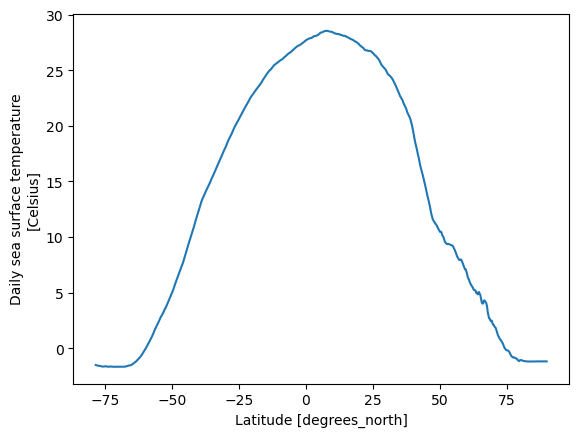

In [5]:
sst.groupby('lat').mean(...).plot()

What do we see? Hot water near the equator and chilly water near the poles.

:::{note}

The ellipses `...` inside the `.mean()` tell xarray to take the mean over all of the remaining axis. You wouldn't have to do that - you may instead want to take the mean over just the latitude and keep the time resolution. It's quite common, though, to want to aggregate over all remaining axis.

:::

### time dimension

If your data has a time dimension and it is formatted as a datetime object you can take advantage of some slick grouping capabilities. For example, you can group by a time group like `'time.month'`, which will grab all make 12 groups for you, putting all the data from each month into its own group.

In [6]:
# We only have 1 month, so this doesn't fly here  maybe on homework?
sst.groupby('time.month').mean()

<xarray.DataArray 'sst' (month: 1, lat: 720, lon: 1440)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.1899999, -1.1899999, -1.1899999, ..., -1.1899999,
         -1.1899999, -1.1899999],
        [-1.1899999, -1.1899999, -1.1899999, ..., -1.1899999,
         -1.1899999, -1.1899999],
        [-1.1899999, -1.1899999, -1.1899999, ..., -1.1899999,
         -1.1899999, -1.1899999]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * month    (month) int64 10
Attributes:
    long_name:    Daily sea surface temperature
    units:        Celsius
    valid_min:    -300
    valid_max:    4500
    _ChunkSizes:  [   1    1  720 1440]

**Note**: bluk of this lesson I think is complete.

It may be nice to have a different dataset for this one. Something with higher dimensionality and perhaps even a group with species names or something in it.

## groupby bins

### Breaking down the process

There is a lot that happens in a single step with `groupby` and it can be a lot to take in.  One way to mentally situate this process is to think about **split-apply-combine**.

**split-apply-combine** breaks down the `groupby` process into those three steps:
1. SPLIT the full data set into groups.  Split is related to the question _Which variable to group together?_
2. APPLY the aggregation function to the individual groups.  Apply is related to the question _How do we want to group?_
3. COMBINE the aggregated data into a new dataframe


<img src="https://static.packt-cdn.com/products/9781783985128/graphics/5128OS_09_01.jpg" width=550>